In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import os
import calendar


Bad key "text.kerning_factor" on line 4 in
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
csv_path = Path("seattle-neighborhoods.csv")
df = pd.read_csv(csv_path)

In [3]:
df.head()
df = df.fillna(method="pad")
df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,"Seattle, WA",February 2012,$320K,6.7%,-5.9%,495,11.7%,14.6%,779,21.3%,-11.5%,"1,928",-4.8%,-33.9%,62.0,2.0,-12.0,97.2%,0.3%,0.8%
1,"Seattle, WA",March 2012,$350K,9.4%,0.0%,670,35.4%,0.8%,998,28.1%,-5.9%,"1,930",0.1%,-34.7%,40.0,-22.0,-26.0,98.1%,0.9%,1.3%
2,"Seattle, WA",April 2012,$379K,8.3%,7.2%,778,16.1%,14.1%,"1,037",3.9%,-7.9%,"1,944",0.7%,-36.9%,30.0,-10.0,-13.0,98.5%,0.4%,1.2%
3,"Seattle, WA",May 2012,$380K,0.3%,9.4%,890,14.4%,28.6%,"1,077",3.9%,4.9%,"1,952",0.4%,-36.7%,19.0,-11.0,-15.0,99.2%,0.7%,1.9%
4,"Seattle, WA",June 2012,$380K,0.0%,8.1%,927,4.2%,13.6%,"1,014",-5.8%,-6.2%,"1,969",0.9%,-38.4%,17.0,-2.0,-20.0,99.3%,0.1%,2.0%


In [4]:
seattle_df = df.drop(df[df["Region"] != "Seattle, WA"].index)
seattle_df["Region"] = seattle_df["Region"].str.replace("Seattle, WA", "Seattle")
seattle_df.set_index("Region", inplace=True)
seattle_df.dtypes

Month of Period End           object
Median Sale Price             object
Median Sale Price MoM         object
Median Sale Price YoY         object
Homes Sold                    object
Homes Sold MoM                object
Homes Sold YoY                object
New Listings                  object
New Listings MoM              object
New Listings YoY              object
Inventory                     object
Inventory MoM                 object
 Inventory YoY                object
Days on Market               float64
Days on Market MoM           float64
Days on Market YoY           float64
Average Sale To List          object
Average Sale To List MoM      object
Average Sale To List YoY      object
dtype: object

In [5]:
neighborhood_df = df.drop(df[df["Region"] == "Seattle, WA"].index)
neighborhood_df.head()
neighborhood_df["Region"] = neighborhood_df["Region"].str.split("-")
neighborhood_df["Region"] = neighborhood_df["Region"].str[1]


#neighborhood_df["Month of Period End"] = neighborhood_df["Month of Period End"].str.split(" ")
#neighborhood_df["Year"]= neighborhood_df["Month of Period End"].str[1]
#neighborhood_df["Month of Period End"] = neighborhood_df["Month of Period End"].str[0]
#name_to_num = {name: num for num, name in enumerate(calendar.month_name) if num}
#neighborhood_df["Month of Period End"] = neighborhood_df["Month of Period End"].apply(lambda x: name_to_num[x])


neighborhood_df.set_index("Region", inplace=True)

pd.to_datetime(neighborhood_df["Month of Period End"])

neighborhood_df.head()

,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Region,,,,,,,,,,,,,,,,,,,
Adams,February 2012,$348K,-0.7%,3.7%,40,-7.0%,25.0%,28,-15.2%,-37.8%,30,-3.2%,-37.5%,40.0,-10.0,-17.0,98.6%,0.2%,1.0%
Adams,March 2012,$347K,-0.1%,4.4%,40,0.0%,11.1%,43,53.6%,-33.8%,25,-16.7%,-50.0%,49.0,10.0,-6.0,98.6%,-0.1%,0.3%
Adams,April 2012,$325K,-6.3%,-6.7%,47,17.5%,6.8%,65,51.2%,20.4%,37,48.0%,-22.9%,46.0,-4.0,27.0,98.7%,0.2%,0.1%
Adams,May 2012,$332K,2.0%,-8.4%,56,19.1%,21.7%,71,9.2%,26.8%,32,-13.5%,-37.3%,37.0,-9.0,8.0,99.2%,0.4%,0.7%
Adams,June 2012,$328K,-1.1%,-2.2%,63,12.5%,61.5%,68,-4.2%,41.7%,25,-21.9%,-50.0%,16.0,-21.0,-23.0,99.0%,-0.2%,-0.6%


In [6]:
#neighborhood_df.replace({"Median Sale Price": {'$': ''}}, regex=True)

neighborhood_df["Median Sale Price"] = neighborhood_df["Median Sale Price"].str.replace("$", "")
dictionary = {'%':'', 'K':'', '$' : '', ',' : ''} 
neighborhood_df.replace(dictionary, regex=True, inplace=True)
neighborhood_df.head()

,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Region,,,,,,,,,,,,,,,,,,,
Adams,February 2012,348,-0.7,3.7,40,-7.0,25.0,28,-15.2,-37.8,30,-3.2,-37.5,40.0,-10.0,-17.0,98.6,0.2,1.0
Adams,March 2012,347,-0.1,4.4,40,0.0,11.1,43,53.6,-33.8,25,-16.7,-50.0,49.0,10.0,-6.0,98.6,-0.1,0.3
Adams,April 2012,325,-6.3,-6.7,47,17.5,6.8,65,51.2,20.4,37,48.0,-22.9,46.0,-4.0,27.0,98.7,0.2,0.1
Adams,May 2012,332,2.0,-8.4,56,19.1,21.7,71,9.2,26.8,32,-13.5,-37.3,37.0,-9.0,8.0,99.2,0.4,0.7
Adams,June 2012,328,-1.1,-2.2,63,12.5,61.5,68,-4.2,41.7,25,-21.9,-50.0,16.0,-21.0,-23.0,99.0,-0.2,-0.6


In [7]:
seattle_df["Median Sale Price"] = seattle_df["Median Sale Price"].str.replace("$", "")
seattle_df.replace(dictionary, regex=True, inplace=True)
seattle_df.head()

,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Region,,,,,,,,,,,,,,,,,,,
Seattle,February 2012,320,6.7,-5.9,495,11.7,14.6,779,21.3,-11.5,1928,-4.8,-33.9,62.0,2.0,-12.0,97.2,0.3,0.8
Seattle,March 2012,350,9.4,0.0,670,35.4,0.8,998,28.1,-5.9,1930,0.1,-34.7,40.0,-22.0,-26.0,98.1,0.9,1.3
Seattle,April 2012,379,8.3,7.2,778,16.1,14.1,1037,3.9,-7.9,1944,0.7,-36.9,30.0,-10.0,-13.0,98.5,0.4,1.2
Seattle,May 2012,380,0.3,9.4,890,14.4,28.6,1077,3.9,4.9,1952,0.4,-36.7,19.0,-11.0,-15.0,99.2,0.7,1.9
Seattle,June 2012,380,0.0,8.1,927,4.2,13.6,1014,-5.8,-6.2,1969,0.9,-38.4,17.0,-2.0,-20.0,99.3,0.1,2.0


In [8]:
cols = [i for i in neighborhood_df.columns if i not in ["Region", "Month of Period End"]]
for col in cols:
    neighborhood_df[col]=pd.to_numeric(neighborhood_df[col])

In [9]:
neighborhood_df.columns = ['Month_of_Period_End','Median_Sale_Price',
 'Median_Sale_Price_MoM',
 'Median_Sale_Price_YoY',
 'Homes_Sold',
 'Homes_Sold_MoM',
 'Homes_Sold_YoY',
 'New_Listings',
 'New_Listings_MoM',
 'New_Listings_YoY',
 'Inventory',
 'Inventory_MoM',
 ' Inventory_YoY',
 'Days_on_Market',
 'Days_on_Market_MoM',
 'Days_on_Market_YoY',
 'Average_Sale_To_List',
 'Average_Sale_To_List_MoM',
 'Average_Sale_To_List_YoY']

In [10]:
neighborhood_df.dtypes

Month_of_Period_End          object
Median_Sale_Price             int64
Median_Sale_Price_MoM       float64
Median_Sale_Price_YoY       float64
Homes_Sold                    int64
Homes_Sold_MoM              float64
Homes_Sold_YoY              float64
New_Listings                  int64
New_Listings_MoM            float64
New_Listings_YoY            float64
Inventory                     int64
Inventory_MoM               float64
 Inventory_YoY              float64
Days_on_Market              float64
Days_on_Market_MoM          float64
Days_on_Market_YoY          float64
Average_Sale_To_List        float64
Average_Sale_To_List_MoM    float64
Average_Sale_To_List_YoY    float64
dtype: object

In [11]:
std_df = pd.DataFrame(neighborhood_df["Median_Sale_Price"])

std_df = std_df.groupby('Region').std()

std_df.sort_values(by=['Median_Sale_Price'], inplace = True)

std_df.head()

,Median_Sale_Price
Region,
Belltown,94.360550
Broadway,107.913857
International District,109.137672
Pinehurst,110.124877
Dunlap,110.136002


In [12]:
belltown_df = neighborhood_df.loc[neighborhood_df.index == " Belltown"]
#belltown_df = neighborhood_df.get_group(" Belltown")
#df_A=df.loc[df['Region']==A]

#neighborhood_df.index.unique()

belltown_df.head()


,Month_of_Period_End,Median_Sale_Price,Median_Sale_Price_MoM,Median_Sale_Price_YoY,Homes_Sold,Homes_Sold_MoM,Homes_Sold_YoY,New_Listings,New_Listings_MoM,New_Listings_YoY,Inventory,Inventory_MoM,Inventory_YoY,Days_on_Market,Days_on_Market_MoM,Days_on_Market_YoY,Average_Sale_To_List,Average_Sale_To_List_MoM,Average_Sale_To_List_YoY
Region,,,,,,,,,,,,,,,,,,,
Belltown,February 2012,357,-6.6,-1.5,42,-22.2,-6.7,53,8.2,-11.7,61,-1.6,-37.8,45.0,24.0,-41.0,96.6,-0.3,0.5
Belltown,March 2012,350,-1.8,4.5,43,2.4,-10.4,77,45.3,-11.5,59,-3.3,-47.3,65.0,21.0,-4.0,96.7,0.0,0.8
Belltown,April 2012,358,2.3,17.0,65,51.2,22.6,103,33.8,5.1,69,16.9,-40.0,53.0,-13.0,-67.0,97.9,1.2,2.5
Belltown,May 2012,423,18.1,51.0,81,24.6,47.3,113,9.7,1.8,72,4.3,-35.7,39.0,-14.0,-46.0,98.0,0.1,2.8
Belltown,June 2012,419,-0.8,51.4,98,21.0,53.1,111,-1.8,-0.9,65,-9.7,-43.0,36.0,-3.0,-17.0,98.2,0.2,2.1


In [13]:
belltown_df['Month_of_Period_End'] = pd.to_datetime(belltown_df['Month_of_Period_End'], infer_datetime_format=True)


C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


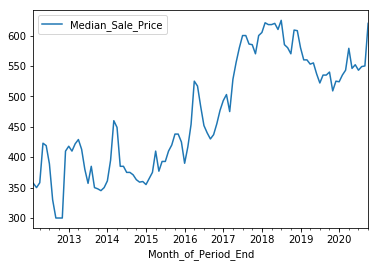

In [14]:
#belltown_df["Median Sale Price","Year"].plot()

belltown_df.plot(y="Median_Sale_Price", x="Month_of_Period_End", kind="line")

In [15]:
from statsmodels.tsa.stattools import adfuller
adfuller(belltown_df.Median_Sale_Price)

(-0.7513717688393351,
 0.8329907730802781,
 3,
 101,
 {'1%': -3.4968181663902103,
  '5%': -2.8906107514600103,
  '10%': -2.5822770483285953},
 833.365488387235)

In [16]:
belltown_df['Returns'] = belltown_df.Median_Sale_Price.pct_change()
belltown_df = belltown_df.dropna()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
train = belltown_df.iloc[:94,:] 
test = belltown_df.iloc[95:,:]

Comparison_l1 = pd.DataFrame()
#Comparison.index = test.index
Comparison_l1["Original"] = (test.loc[:, 'Returns'])
Returns = train.loc[:, 'Returns']
Comparison_l1

,Original
Region,
Belltown,0.020992
Belltown,0.014953
Belltown,0.066298
Belltown,-0.056995
Belltown,0.010989
Belltown,-0.016304
Belltown,0.011050
Belltown,0.001821
Belltown,0.127273


In [18]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(Returns.values, order=(1,1))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:                     ARMA(1, 1)   Log Likelihood                 122.306
Method:                       css-mle   S.D. of innovations              0.066
Date:                Fri, 04 Dec 2020   AIC                           -236.611
Time:                        23:32:31   BIC                           -226.438
Sample:                             0   HQIC                          -232.502
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0062      0.008      0.788      0.431      -0.009       0.022
ar.L1.y        0.0027      0.360      0.007      0.994      -0.702       0.708
ma.L1.y        0.1585      0.345      0.459      0.646      -0.518       0.835
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          371.7613           +0.0000j          371.7613            0.0000
MA.1           -6.3098           +0.0000j            6.3098            0.5000
-----------------------------------------------------------------------------
"""

In [19]:
predicted_arma = results.forecast(steps=9)[0]
Comparison_l1["Arma"] = predicted_arma
Comparison_l1

,Original,Arma
Region,,
Belltown,0.020992,0.011920
Belltown,0.014953,0.006226
Belltown,0.066298,0.006211
Belltown,-0.056995,0.006211
Belltown,0.010989,0.006211
Belltown,-0.016304,0.006211
Belltown,0.011050,0.006211
Belltown,0.001821,0.006211
Belltown,0.127273,0.006211


In [20]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Returns, order=(1, 1, 1))
results = model.fit()
results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Returns   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 118.367
Method:                       css-mle   S.D. of innovations              0.066
Date:                Fri, 04 Dec 2020   AIC                           -228.734
Time:                        23:32:31   BIC                           -218.603
Sample:                             1   HQIC                          -224.643
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0001      0.000     -0.373      0.709      -0.001       0.000
ar.L1.D.Returns     0.1615      0.103      1.569      0.117      -0.040       0.363
ma.L1.D.Returns    -1.0000      0.028    -35.159      0.000      -1.056      -0.944
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            6.1910           +0.0000j            6.1910            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [21]:
predicted_arima = results.forecast(steps=9)[0]
Comparison_l1["Arima"] = predicted_arma
Comparison_l1

,Original,Arma,Arima
Region,,,
Belltown,0.020992,0.011920,0.011920
Belltown,0.014953,0.006226,0.006226
Belltown,0.066298,0.006211,0.006211
Belltown,-0.056995,0.006211,0.006211
Belltown,0.010989,0.006211,0.006211
Belltown,-0.016304,0.006211,0.006211
Belltown,0.011050,0.006211,0.006211
Belltown,0.001821,0.006211,0.006211
Belltown,0.127273,0.006211,0.006211


In [22]:
from arch import arch_model
model = arch_model(Returns, mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:                130.361
Distribution:                  Normal   AIC:                          -254.722
Method:            Maximum Likelihood   BIC:                          -247.092
                                        No. Observations:                   94
Date:                Fri, Dec 04 2020   Df Residuals:                       91
Time:                        23:32:34   Df Model:                            3
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      8.9813e-05  2.083e-04      0.431      0.666 [-3.185e-04,4.982e-04]
alpha[1]       0.1000  4.951e-02      2.020  4.340e-02    [2.963e-03,  0.197]
beta[1]        0.8800  4.973e-02     17.697  4.399e-70      [  0.783,  0.977]
=============================================================================

Covariance estimator: robust
"""

In [23]:
import numpy as np

forecast_horizon = 9
garch = res.forecast(horizon=forecast_horizon)
intermediate = np.sqrt(garch.variance.dropna() * 252)
final = intermediate.dropna().T
final.columns = ["Garch"]
final.index = Comparison_l1.index
Comparison_l1["Garch"] = final["Garch"]

In [24]:
X = belltown_df[["Homes_Sold", "New_Listings","Inventory", "Days_on_Market", "Average_Sale_To_List" ]].copy()
y = belltown_df["Median_Sale_Price"].ravel()
y[:5]

array([350, 358, 423, 419, 389], dtype=int64)

In [25]:
xtrain = X.iloc[:94,:] 
xtest = X.iloc[95:,:]

ytrain = y[0:94]
ytest = y[95::]

xtest

,Homes_Sold,New_Listings,Inventory,Days_on_Market,Average_Sale_To_List
Region,,,,,
Belltown,49,55,34,41.0,97.4
Belltown,48,75,45,22.0,98.8
Belltown,46,73,47,15.0,99.0
Belltown,40,77,62,13.0,99.3
Belltown,29,85,76,15.0,99.2
Belltown,41,119,95,18.0,98.8
Belltown,53,142,115,18.0,98.4
Belltown,70,146,125,19.0,98.0
Belltown,69,121,110,20.0,97.7


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [27]:
X_scaler = scaler.fit(xtrain)
X_train_scaled = X_scaler.transform(xtrain)
X_test_scaled = X_scaler.transform(xtest)

In [28]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, ytrain)
predictions = rf_model.predict(X_test_scaled)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
importances = rf_model.feature_importances_

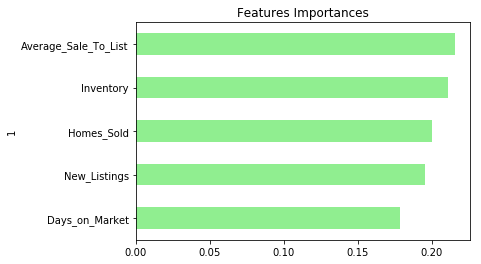

In [30]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


# low std 2

In [31]:
broadway_df = neighborhood_df.loc[neighborhood_df.index == " Broadway"]
broadway_df.head()

,Month_of_Period_End,Median_Sale_Price,Median_Sale_Price_MoM,Median_Sale_Price_YoY,Homes_Sold,Homes_Sold_MoM,Homes_Sold_YoY,New_Listings,New_Listings_MoM,New_Listings_YoY,Inventory,Inventory_MoM,Inventory_YoY,Days_on_Market,Days_on_Market_MoM,Days_on_Market_YoY,Average_Sale_To_List,Average_Sale_To_List_MoM,Average_Sale_To_List_YoY
Region,,,,,,,,,,,,,,,,,,,
Broadway,February 2012,265,1.0,-28.4,59,9.3,3.5,67,3.1,-1.5,56,-9.7,-49.5,47.0,0.0,-99.0,96.8,-0.3,1.2
Broadway,March 2012,260,-2.1,-13.5,68,15.3,28.3,71,6.0,-22.8,54,-3.6,-48.6,34.0,-13.0,-116.0,97.1,0.3,1.8
Broadway,April 2012,305,17.5,-9.6,72,5.9,24.1,83,16.9,-17.8,61,13.0,-35.8,47.0,13.0,-84.0,96.3,-0.8,-2.7
Broadway,May 2012,315,3.3,-1.3,79,9.7,2.6,95,14.5,-6.9,54,-11.5,-47.1,30.0,-17.0,-58.0,97.4,1.1,-1.4
Broadway,June 2012,290,-7.9,-13.4,87,10.1,10.1,98,3.2,5.4,62,14.8,-43.6,22.0,-8.0,-26.0,98.3,0.9,-1.0


In [32]:
broadway_df['Month_of_Period_End'] = pd.to_datetime(broadway_df['Month_of_Period_End'], infer_datetime_format=True)

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


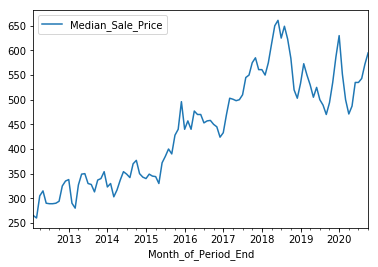

In [33]:
broadway_df.plot(y="Median_Sale_Price", x="Month_of_Period_End", kind="line")

In [34]:
adfuller(broadway_df.Median_Sale_Price)

(-0.9342852020083348,
 0.7764722818571573,
 3,
 101,
 {'1%': -3.4968181663902103,
  '5%': -2.8906107514600103,
  '10%': -2.5822770483285953},
 840.6197626260614)

In [35]:
broadway_df['Returns'] = broadway_df.Median_Sale_Price.pct_change()
broadway_df = broadway_df.dropna()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
train = broadway_df.iloc[:94,:] 
test = broadway_df.iloc[95:,:]

Comparison_l2 = pd.DataFrame()
#Comparison.index = test.index
Comparison_l2["Original"] = (test.loc[:, 'Returns'])
Returns = train.loc[:, 'Returns']
Comparison_l2

,Original
Region,
Broadway,-0.123810
Broadway,-0.094203
Broadway,-0.058000
Broadway,0.033970
Broadway,0.098563
Broadway,0.000000
Broadway,0.014953
Broadway,0.053407
Broadway,0.040210


In [37]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(Returns.values, order=(1,1))
results = model.fit()

results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:                     ARMA(1, 1)   Log Likelihood                 134.501
Method:                       css-mle   S.D. of innovations              0.058
Date:                Fri, 04 Dec 2020   AIC                           -261.003
Time:                        23:32:38   BIC                           -250.829
Sample:                             0   HQIC                          -256.893
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0101      0.006      1.700      0.089      -0.002       0.022
ar.L1.y       -1.0000      0.013    -74.749      0.000      -1.026      -0.974
ma.L1.y        1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0000           +0.0000j            1.0000            0.5000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

In [38]:
predicted_arma = results.forecast(steps=9)[0]
Comparison_l2["Arma"] = predicted_arma
Comparison_l2

,Original,Arma
Region,,
Broadway,-0.123810,0.010145
Broadway,-0.094203,0.010144
Broadway,-0.058000,0.010145
Broadway,0.033970,0.010144
Broadway,0.098563,0.010145
Broadway,0.000000,0.010144
Broadway,0.014953,0.010145
Broadway,0.053407,0.010144
Broadway,0.040210,0.010145


In [39]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Returns, order=(1, 1, 1))
results = model.fit()
results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Returns   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 130.508
Method:                       css-mle   S.D. of innovations              0.058
Date:                Fri, 04 Dec 2020   AIC                           -253.016
Time:                        23:32:39   BIC                           -242.886
Sample:                             1   HQIC                          -248.926
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.179e-05      0.000     -0.395      0.693      -0.001       0.000
ar.L1.D.Returns     0.0498      0.105      0.473      0.637      -0.157       0.256
ma.L1.D.Returns    -0.9999      0.028    -35.460      0.000      -1.055      -0.945
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           20.0821           +0.0000j           20.0821            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [40]:
predicted_arima = results.forecast(steps=9)[0]
Comparison_l2["Arima"] = predicted_arma
Comparison_l2

,Original,Arma,Arima
Region,,,
Broadway,-0.123810,0.010145,0.010145
Broadway,-0.094203,0.010144,0.010144
Broadway,-0.058000,0.010145,0.010145
Broadway,0.033970,0.010144,0.010144
Broadway,0.098563,0.010145,0.010145
Broadway,0.000000,0.010144,0.010144
Broadway,0.014953,0.010145,0.010145
Broadway,0.053407,0.010144,0.010144
Broadway,0.040210,0.010145,0.010145


In [41]:
from arch import arch_model
model = arch_model(Returns, mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.003347. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:                134.856
Distribution:                  Normal   AIC:                          -263.713
Method:            Maximum Likelihood   BIC:                          -256.083
                                        No. Observations:                   94
Date:                Fri, Dec 04 2020   Df Residuals:                       91
Time:                        23:32:39   Df Model:                            3
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      9.1256e-05  3.486e-05      2.618  8.857e-03 [2.292e-05,1.596e-04]
alpha[1]       0.0000  5.109e-02      0.000      1.000     [ -0.100,  0.100]
beta[1]        0.9640  5.814e-02     16.580  9.765e-62     [  0.850,  1.078]
============================================================================

Covariance estimator: robust
"""

In [42]:
import numpy as np

forecast_horizon = 9
garch = res.forecast(horizon=forecast_horizon)
intermediate = np.sqrt(garch.variance.dropna() * 252)
final = intermediate.dropna().T
final.columns = ["Garch"]
final.index = Comparison_l2.index
Comparison_l2["Garch"] = final["Garch"]

In [43]:
Comparison_l2

,Original,Arma,Arima,Garch
Region,,,,
Broadway,-0.123810,0.010145,0.010145,0.811619
Broadway,-0.094203,0.010144,0.010144,0.811174
Broadway,-0.058000,0.010145,0.010145,0.810744
Broadway,0.033970,0.010144,0.010144,0.810330
Broadway,0.098563,0.010145,0.010145,0.809931
Broadway,0.000000,0.010144,0.010144,0.809545
Broadway,0.014953,0.010145,0.010145,0.809174
Broadway,0.053407,0.010144,0.010144,0.808815
Broadway,0.040210,0.010145,0.010145,0.808470


In [44]:
X = broadway_df[["Homes_Sold", "New_Listings","Inventory", "Days_on_Market", "Average_Sale_To_List" ]].copy()
y = broadway_df["Median_Sale_Price"].ravel()
y[:5]

array([260, 305, 315, 290, 289], dtype=int64)

In [45]:
xtrain = X.iloc[:94,:] 
xtest = X.iloc[95:,:]

ytrain = y[0:94]
ytest = y[95::]

xtest

,Homes_Sold,New_Listings,Inventory,Days_on_Market,Average_Sale_To_List
Region,,,,,
Broadway,82,89,41,44.0,99.1
Broadway,94,106,46,22.0,100.1
Broadway,94,105,52,13.0,100.3
Broadway,76,91,55,10.0,100.3
Broadway,61,109,63,12.0,99.4
Broadway,71,133,77,13.0,99.7
Broadway,89,173,116,12.0,99.4
Broadway,92,168,122,11.0,99.4
Broadway,86,161,126,18.0,98.8


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [47]:
X_scaler = scaler.fit(xtrain)
X_train_scaled = X_scaler.transform(xtrain)
X_test_scaled = X_scaler.transform(xtest)

In [48]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, ytrain)
predictions = rf_model.predict(X_test_scaled)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
importances = rf_model.feature_importances_

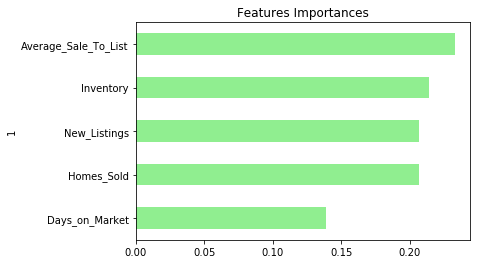

In [50]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


# low std 3

In [51]:
internationaldistrict_df = neighborhood_df.loc[neighborhood_df.index == " International District"]
internationaldistrict_df.head()

,Month_of_Period_End,Median_Sale_Price,Median_Sale_Price_MoM,Median_Sale_Price_YoY,Homes_Sold,Homes_Sold_MoM,Homes_Sold_YoY,New_Listings,New_Listings_MoM,New_Listings_YoY,Inventory,Inventory_MoM,Inventory_YoY,Days_on_Market,Days_on_Market_MoM,Days_on_Market_YoY,Average_Sale_To_List,Average_Sale_To_List_MoM,Average_Sale_To_List_YoY
Region,,,,,,,,,,,,,,,,,,,
International District,February 2012,185,24.2,-18.5,1,-75.0,0.0,2,-33.3,0.0,1,-50.0,-83.3,6.0,-7.0,-58.0,100.0,-0.5,1.3
International District,March 2012,160,-13.8,-0.3,4,300.0,300.0,3,50.0,50.0,2,100.0,-50.0,21.0,15.0,-244.0,98.8,-1.2,-1.2
International District,April 2012,160,0.0,-0.3,4,0.0,300.0,2,-33.3,-50.0,2,100.0,-50.0,27.0,6.0,-239.0,93.3,-5.5,-6.7
International District,May 2012,160,0.0,-11.4,4,0.0,0.0,1,-50.0,-66.7,2,100.0,-50.0,27.0,0.0,-54.0,93.3,0.0,-4.6
International District,June 2012,160,0.3,-6.8,2,-50.0,-50.0,1,-50.0,-66.7,2,100.0,-50.0,43.0,16.0,-38.0,87.1,-6.2,-11.3


In [52]:
internationaldistrict_df['Month_of_Period_End'] = pd.to_datetime(internationaldistrict_df['Month_of_Period_End'], infer_datetime_format=True)

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


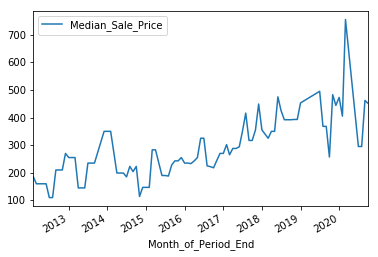

In [53]:
internationaldistrict_df.plot(y="Median_Sale_Price", x="Month_of_Period_End", kind="line")

In [54]:
adfuller(internationaldistrict_df.Median_Sale_Price)

(-0.939163737712231,
 0.7748018833035709,
 6,
 86,
 {'1%': -3.5087828609430614,
  '5%': -2.895783561573195,
  '10%': -2.5850381719848565},
 920.2836691140046)

In [210]:
internationaldistrict_df['Returns'] = internationaldistrict_df.Median_Sale_Price.pct_change()
internationaldistrict_df = internationaldistrict_df.dropna()
internationaldistrict_df.head()

,Month_of_Period_End,Median_Sale_Price,Median_Sale_Price_MoM,Median_Sale_Price_YoY,Homes_Sold,Homes_Sold_MoM,Homes_Sold_YoY,New_Listings,New_Listings_MoM,New_Listings_YoY,Inventory,Inventory_MoM,Inventory_YoY,Days_on_Market,Days_on_Market_MoM,Days_on_Market_YoY,Average_Sale_To_List,Average_Sale_To_List_MoM,Average_Sale_To_List_YoY,Returns
Region,,,,,,,,,,,,,,,,,,,,
International District,2012-04-01,160,0.0,-0.3,4,0.0,300.0,2,-33.3,-50.0,2,100.0,-50.0,27.0,6.0,-239.0,93.3,-5.5,-6.7,0.0000
International District,2012-05-01,160,0.0,-11.4,4,0.0,0.0,1,-50.0,-66.7,2,100.0,-50.0,27.0,0.0,-54.0,93.3,0.0,-4.6,0.0000
International District,2012-06-01,160,0.3,-6.8,2,-50.0,-50.0,1,-50.0,-66.7,2,100.0,-50.0,43.0,16.0,-38.0,87.1,-6.2,-11.3,0.0000
International District,2012-07-01,110,-31.3,-36.0,1,-50.0,-75.0,2,-50.0,-50.0,2,100.0,-50.0,57.0,15.0,-23.0,96.1,9.0,-2.3,-0.3125
International District,2012-08-01,110,0.0,-22.8,1,0.0,-66.7,4,100.0,0.0,1,100.0,-75.0,57.0,0.0,-44.0,96.1,0.0,-5.9,0.0000


In [216]:
train = internationaldistrict_df.iloc[:84,:] 
test = internationaldistrict_df.iloc[85:,:]

Comparison_l3 = pd.DataFrame()
#Comparison.index = test.index
Comparison_l3["Original"] = (test.loc[:, 'Returns'])
Returns = train.loc[:, 'Returns']
Comparison_l3

,Original
Region,
International District,-0.143763
International District,0.864198
International District,-0.609272
International District,0.000000
International District,0.566102
International District,-0.023810


In [217]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(Returns.values, order=(1,1))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:                     ARMA(1, 1)   Log Likelihood                   8.378
Method:                       css-mle   S.D. of innovations              0.215
Date:                Fri, 04 Dec 2020   AIC                             -8.757
Time:                        23:40:15   BIC                              0.967
Sample:                             0   HQIC                            -4.848
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0335      0.002     14.869      0.000       0.029       0.038
ar.L1.y        0.5981      0.090      6.617      0.000       0.421       0.775
ma.L1.y       -1.0000      0.043    -23.369      0.000      -1.084      -0.916
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6720           +0.0000j            1.6720            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [222]:
predicted_arma = results.forecast(steps=6)[0]
Comparison_l3["Arma"] = predicted_arma
Comparison_l3

,Original,Arma
Region,,
International District,-0.143763,0.004746
International District,0.864198,0.016290
International District,-0.609272,0.023195
International District,0.000000,0.027325
International District,0.566102,0.029795
International District,-0.023810,0.031272


In [223]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Returns, order=(1, 1, 1))
results = model.fit()
results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Returns   No. Observations:                   83
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -1.572
Method:                       css-mle   S.D. of innovations              0.240
Date:                Fri, 04 Dec 2020   AIC                             11.144
Time:                        23:40:47   BIC                             20.820
Sample:                             1   HQIC                            15.031
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0002      0.001     -0.165      0.869      -0.002       0.002
ar.L1.D.Returns    -0.1349      0.109     -1.242      0.214      -0.348       0.078
ma.L1.D.Returns    -1.0000      0.031    -32.222      0.000      -1.061      -0.939
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -7.4150           +0.0000j            7.4150            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [225]:
predicted_arima = results.forecast(steps=6)[0]
Comparison_l3["Arima"] = predicted_arma
Comparison_l3

,Original,Arma,Arima
Region,,,
International District,-0.143763,0.004746,0.004746
International District,0.864198,0.016290,0.016290
International District,-0.609272,0.023195,0.023195
International District,0.000000,0.027325,0.027325
International District,0.566102,0.029795,0.029795
International District,-0.023810,0.031272,0.031272


In [226]:
from arch import arch_model
model = arch_model(Returns, mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.05803. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.012
Vol Model:                      GARCH   Log-Likelihood:               0.616055
Distribution:                  Normal   AIC:                           4.76789
Method:            Maximum Likelihood   BIC:                           12.0603
                                        No. Observations:                   84
Date:                Fri, Dec 04 2020   Df Residuals:                       81
Time:                        23:40:58   Df Model:                            3
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.6371e-03  2.015e-03      0.813      0.416 [-2.311e-03,5.585e-03]
alpha[1]       0.0000  8.060e-03      0.000      1.000 [-1.580e-02,1.580e-02]
beta[1]        0.9634  3.930e-02     24.514 1.036e-132      [  0.886,  1.040]
=============================================================================

Covariance estimator: robust
"""

In [228]:
import numpy as np

forecast_horizon = 6
garch = res.forecast(horizon=forecast_horizon)
intermediate = np.sqrt(garch.variance.dropna() * 252)
final = intermediate.dropna().T
final.columns = ["Garch"]
final.index = Comparison_l3.index
Comparison_l3["Garch"] = final["Garch"]

In [229]:
Comparison_l3

,Original,Arma,Arima,Garch
Region,,,,
International District,-0.143763,0.004746,0.004746,3.413784
International District,0.864198,0.016290,0.016290,3.411752
International District,-0.609272,0.023195,0.023195,3.409794
International District,0.000000,0.027325,0.027325,3.407907
International District,0.566102,0.029795,0.029795,3.406088
International District,-0.023810,0.031272,0.031272,3.404334


In [230]:
X = internationaldistrict_df[["Homes_Sold", "New_Listings","Inventory", "Days_on_Market", "Average_Sale_To_List" ]].copy()
y = internationaldistrict_df["Median_Sale_Price"].ravel()
y[:5]

array([160, 160, 160, 110, 110], dtype=int64)

In [232]:
xtrain = X.iloc[:84,:] 
xtest = X.iloc[85:,:]

ytrain = y[0:84]
ytest = y[85::]

xtest

,Homes_Sold,New_Listings,Inventory,Days_on_Market,Average_Sale_To_List
Region,,,,,
International District,3,6,6,63.0,104.0
International District,2,6,6,36.0,107.2
International District,1,4,8,20.0,100.0
International District,1,8,11,20.0,100.0
International District,2,7,12,11.0,100.0
International District,2,6,10,16.0,97.7


In [233]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [234]:
X_scaler = scaler.fit(xtrain)
X_train_scaled = X_scaler.transform(xtrain)
X_test_scaled = X_scaler.transform(xtest)

In [235]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, ytrain)
predictions = rf_model.predict(X_test_scaled)

In [236]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
importances = rf_model.feature_importances_

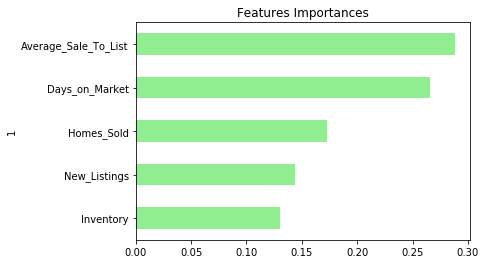

In [237]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


# low std 4

In [69]:
pinehurst_df = neighborhood_df.loc[neighborhood_df.index == " Pinehurst"]
pinehurst_df.head()

,Month_of_Period_End,Median_Sale_Price,Median_Sale_Price_MoM,Median_Sale_Price_YoY,Homes_Sold,Homes_Sold_MoM,Homes_Sold_YoY,New_Listings,New_Listings_MoM,New_Listings_YoY,Inventory,Inventory_MoM,Inventory_YoY,Days_on_Market,Days_on_Market_MoM,Days_on_Market_YoY,Average_Sale_To_List,Average_Sale_To_List_MoM,Average_Sale_To_List_YoY
Region,,,,,,,,,,,,,,,,,,,
Pinehurst,February 2012,233,-6.8,-13.7,15,25.0,50.0,7,40.0,-30.0,7,-12.5,-65.0,119.0,19.0,77.0,95.3,0.2,-3.4
Pinehurst,March 2012,185,-20.8,-41.0,12,-20.0,140.0,12,71.4,-40.0,13,85.7,-48.0,132.0,13.0,58.0,94.4,-0.9,-2.6
Pinehurst,April 2012,242,30.9,-3.5,12,0.0,20.0,17,41.7,-5.6,13,0.0,-45.8,90.0,-42.0,35.0,95.7,1.3,-1.2
Pinehurst,May 2012,220,-8.9,-7.3,12,0.0,0.0,18,5.9,-21.7,9,-30.8,-62.5,42.0,-49.0,1.0,97.3,1.6,0.8
Pinehurst,June 2012,228,3.4,5.8,18,50.0,20.0,22,22.2,10.0,13,44.4,-45.8,28.0,-14.0,-33.0,99.9,2.6,4.1


In [70]:
pinehurst_df['Month_of_Period_End'] = pd.to_datetime(pinehurst_df['Month_of_Period_End'], infer_datetime_format=True)

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


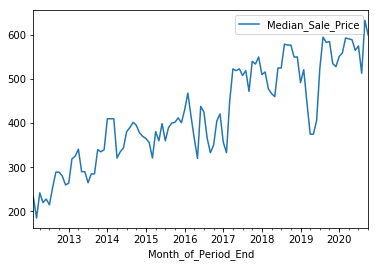

In [71]:
pinehurst_df.plot(y="Median_Sale_Price", x="Month_of_Period_End", kind="line")

In [72]:
adfuller(pinehurst_df.Median_Sale_Price)

(-1.4583612833381765,
 0.5539997537537683,
 3,
 101,
 {'1%': -3.4968181663902103,
  '5%': -2.8906107514600103,
  '10%': -2.5822770483285953},
 933.8976620819795)

In [73]:
pinehurst_df['Returns'] = pinehurst_df.Median_Sale_Price.pct_change()
pinehurst_df = pinehurst_df.dropna()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
train = pinehurst_df.iloc[:94,:] 
test = pinehurst_df.iloc[95:,:]

Comparison_l4 = pd.DataFrame()
#Comparison.index = test.index
Comparison_l4["Original"] = (test.loc[:, 'Returns'])
Returns = train.loc[:, 'Returns']
Comparison_l4

,Original
Region,
Pinehurst,0.014519
Pinehurst,0.060823
Pinehurst,-0.003373
Pinehurst,-0.003384
Pinehurst,-0.040747
Pinehurst,0.017699
Pinehurst,-0.107826
Pinehurst,0.233918
Pinehurst,-0.052133


In [75]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(Returns.values, order=(1,1))
results = model.fit()

results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:                     ARMA(1, 1)   Log Likelihood                  74.427
Method:                       css-mle   S.D. of innovations              0.109
Date:                Fri, 04 Dec 2020   AIC                           -140.854
Time:                        23:34:43   BIC                           -130.681
Sample:                             0   HQIC                          -136.745
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0146   9.63e-07   1.52e+04      0.000       0.015       0.015
ar.L1.y       -1.0000        nan        nan        nan         nan         nan
ma.L1.y        0.9996      0.000   2994.596      0.000       0.999       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0000           +0.0000j            1.0000            0.5000
MA.1           -1.0004           +0.0000j            1.0004            0.5000
-----------------------------------------------------------------------------
"""

In [76]:
predicted_arma = results.forecast(steps=9)[0]
Comparison_l4["Arma"] = predicted_arma
Comparison_l4

,Original,Arma
Region,,
Pinehurst,0.014519,-0.010486
Pinehurst,0.060823,0.039759
Pinehurst,-0.003373,-0.010486
Pinehurst,-0.003384,0.039759
Pinehurst,-0.040747,-0.010486
Pinehurst,0.017699,0.039759
Pinehurst,-0.107826,-0.010486
Pinehurst,0.233918,0.039759
Pinehurst,-0.052133,-0.010486


In [77]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Returns, order=(1, 1, 1))
results = model.fit()
results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Returns   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  69.345
Method:                       css-mle   S.D. of innovations              0.112
Date:                Fri, 04 Dec 2020   AIC                           -130.690
Time:                        23:34:44   BIC                           -120.560
Sample:                             1   HQIC                          -126.600
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0002      0.000     -0.449      0.653      -0.001       0.001
ar.L1.D.Returns    -0.0668      0.106     -0.631      0.528      -0.274       0.141
ma.L1.D.Returns    -0.9999      0.028    -36.316      0.000      -1.054      -0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -14.9760           +0.0000j           14.9760            0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [78]:
predicted_arima = results.forecast(steps=9)[0]
Comparison_l4["Arima"] = predicted_arma
Comparison_l4

,Original,Arma,Arima
Region,,,
Pinehurst,0.014519,-0.010486,-0.010486
Pinehurst,0.060823,0.039759,0.039759
Pinehurst,-0.003373,-0.010486,-0.010486
Pinehurst,-0.003384,0.039759,0.039759
Pinehurst,-0.040747,-0.010486,-0.010486
Pinehurst,0.017699,0.039759,0.039759
Pinehurst,-0.107826,-0.010486,-0.010486
Pinehurst,0.233918,0.039759,0.039759
Pinehurst,-0.052133,-0.010486,-0.010486


In [79]:
from arch import arch_model
model = arch_model(Returns, mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01249. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:                72.6501
Distribution:                  Normal   AIC:                          -139.300
Method:            Maximum Likelihood   BIC:                          -131.670
                                        No. Observations:                   94
Date:                Fri, Dec 04 2020   Df Residuals:                       91
Time:                        23:34:44   Df Model:                            3
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.7179e-03  2.162e-03      0.795      0.427 [-2.519e-03,5.954e-03]
alpha[1]       0.0000  3.775e-02      0.000      1.000 [-7.399e-02,7.399e-02]
beta[1]        0.8524      0.215      3.962  7.436e-05      [  0.431,  1.274]
=============================================================================

Covariance estimator: robust
"""

In [80]:
import numpy as np

forecast_horizon = 9
garch = res.forecast(horizon=forecast_horizon)
intermediate = np.sqrt(garch.variance.dropna() * 252)
final = intermediate.dropna().T
final.columns = ["Garch"]
final.index = Comparison_l4.index
Comparison_l4["Garch"] = final["Garch"]

In [81]:
Comparison_l4

,Original,Arma,Arima,Garch
Region,,,,
Pinehurst,0.014519,-0.010486,-0.010486,1.712566
Pinehurst,0.060823,0.039759,0.039759,1.712566
Pinehurst,-0.003373,-0.010486,-0.010486,1.712566
Pinehurst,-0.003384,0.039759,0.039759,1.712566
Pinehurst,-0.040747,-0.010486,-0.010486,1.712566
Pinehurst,0.017699,0.039759,0.039759,1.712566
Pinehurst,-0.107826,-0.010486,-0.010486,1.712566
Pinehurst,0.233918,0.039759,0.039759,1.712566
Pinehurst,-0.052133,-0.010486,-0.010486,1.712566


In [82]:
X = pinehurst_df[["Homes_Sold", "New_Listings","Inventory", "Days_on_Market", "Average_Sale_To_List" ]].copy()
y = pinehurst_df["Median_Sale_Price"].ravel()
y[:5]

array([185, 242, 220, 228, 215], dtype=int64)

In [83]:
xtrain = X.iloc[:94,:] 
xtest = X.iloc[95:,:]

ytrain = y[0:94]
ytest = y[95::]

xtest

,Homes_Sold,New_Listings,Inventory,Days_on_Market,Average_Sale_To_List
Region,,,,,
Pinehurst,10,7,1,115.0,98.4
Pinehurst,13,9,2,61.0,101.6
Pinehurst,12,14,3,91.0,102.1
Pinehurst,14,16,2,7.0,103.8
Pinehurst,16,22,5,7.0,102.0
Pinehurst,21,30,9,7.0,102.2
Pinehurst,19,30,6,6.0,103.3
Pinehurst,23,34,9,7.0,104.8
Pinehurst,27,32,12,7.0,104.0


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [85]:
X_scaler = scaler.fit(xtrain)
X_train_scaled = X_scaler.transform(xtrain)
X_test_scaled = X_scaler.transform(xtest)

In [86]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, ytrain)
predictions = rf_model.predict(X_test_scaled)

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
importances = rf_model.feature_importances_

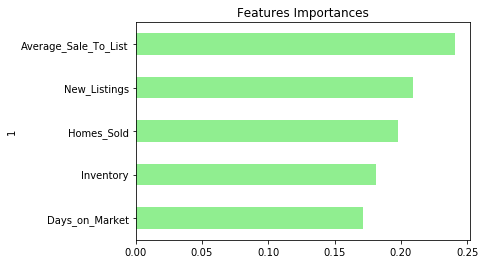

In [88]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


# low std 5

In [89]:
dunlap_df = neighborhood_df.loc[neighborhood_df.index == " Dunlap"]
dunlap_df.head()

,Month_of_Period_End,Median_Sale_Price,Median_Sale_Price_MoM,Median_Sale_Price_YoY,Homes_Sold,Homes_Sold_MoM,Homes_Sold_YoY,New_Listings,New_Listings_MoM,New_Listings_YoY,Inventory,Inventory_MoM,Inventory_YoY,Days_on_Market,Days_on_Market_MoM,Days_on_Market_YoY,Average_Sale_To_List,Average_Sale_To_List_MoM,Average_Sale_To_List_YoY
Region,,,,,,,,,,,,,,,,,,,
Dunlap,February 2012,180,-7.7,9.1,17,0.0,88.9,12,-25.0,-52.0,22,-12.0,-35.3,63.0,28.0,-20.0,97.2,-0.5,-2.7
Dunlap,March 2012,189,5.0,-21.3,12,-29.4,-7.7,17,41.7,-29.2,21,-4.5,-41.7,92.0,29.0,53.0,95.5,-1.7,-1.4
Dunlap,April 2012,188,-0.8,-10.2,16,33.3,33.3,16,-5.9,-46.7,19,-9.5,-40.6,116.0,24.0,80.0,96.0,0.6,-0.6
Dunlap,May 2012,204,8.9,27.6,18,12.5,-14.3,20,25.0,-28.6,20,5.3,-35.5,116.0,0.0,60.0,98.5,2.5,2.5
Dunlap,June 2012,197,-3.3,20.7,20,11.1,0.0,18,-10.0,-37.9,20,0.0,-44.4,108.0,-8.0,33.0,99.0,0.5,2.8


In [90]:
dunlap_df['Month_of_Period_End'] = pd.to_datetime(dunlap_df['Month_of_Period_End'], infer_datetime_format=True)

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


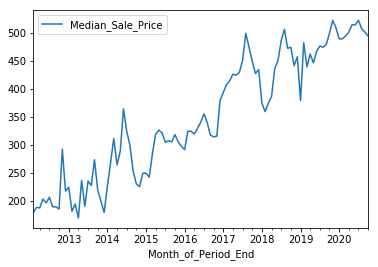

In [91]:
dunlap_df.plot(y="Median_Sale_Price", x="Month_of_Period_End", kind="line")

In [92]:
adfuller(dunlap_df.Median_Sale_Price)

(-0.678945933157321,
 0.85212790771233,
 8,
 96,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446},
 866.0623734966898)

In [93]:
dunlap_df['Returns'] = dunlap_df.Median_Sale_Price.pct_change()
dunlap_df = dunlap_df.dropna()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
train = dunlap_df.iloc[:94,:] 
test = dunlap_df.iloc[95:,:]

Comparison_l5 = pd.DataFrame()
#Comparison.index = test.index
Comparison_l5["Original"] = (test.loc[:, 'Returns'])
Returns = train.loc[:, 'Returns']
Comparison_l5

,Original
Region,
Dunlap,0.000000
Dunlap,0.010204
Dunlap,0.014141
Dunlap,0.025896
Dunlap,0.000000
Dunlap,0.015534
Dunlap,-0.028681
Dunlap,-0.011811
Dunlap,-0.013944


In [95]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(Returns.values, order=(1,1))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:                     ARMA(1, 1)   Log Likelihood                  74.168
Method:                       css-mle   S.D. of innovations              0.110
Date:                Fri, 04 Dec 2020   AIC                           -140.336
Time:                        23:34:48   BIC                           -130.163
Sample:                             0   HQIC                          -136.227
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0177      0.010      1.715      0.086      -0.003       0.038
ar.L1.y       -0.9351      0.054    -17.456      0.000      -1.040      -0.830
ma.L1.y        0.7678      0.093      8.258      0.000       0.586       0.950
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0694           +0.0000j            1.0694            0.5000
MA.1           -1.3025           +0.0000j            1.3025            0.5000
-----------------------------------------------------------------------------
"""

In [96]:
predicted_arma = results.forecast(steps=9)[0]
Comparison_l5["Arma"] = predicted_arma
Comparison_l5

,Original,Arma
Region,,
Dunlap,0.000000,0.016761
Dunlap,0.010204,0.018645
Dunlap,0.014141,0.016883
Dunlap,0.025896,0.018531
Dunlap,0.000000,0.016990
Dunlap,0.015534,0.018431
Dunlap,-0.028681,0.017083
Dunlap,-0.011811,0.018344
Dunlap,-0.013944,0.017165


In [97]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Returns, order=(1, 1, 1))
results = model.fit()
results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Returns   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  65.092
Method:                       css-mle   S.D. of innovations              0.117
Date:                Fri, 04 Dec 2020   AIC                           -122.184
Time:                        23:34:49   BIC                           -112.053
Sample:                             1   HQIC                          -118.093
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0002      0.000     -0.677      0.499      -0.001       0.000
ar.L1.D.Returns    -0.2974      0.098     -3.023      0.003      -0.490      -0.105
ma.L1.D.Returns    -1.0000      0.028    -36.081      0.000      -1.054      -0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3627           +0.0000j            3.3627            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [98]:
predicted_arima = results.forecast(steps=9)[0]
Comparison_l5["Arima"] = predicted_arma
Comparison_l5

,Original,Arma,Arima
Region,,,
Dunlap,0.000000,0.016761,0.016761
Dunlap,0.010204,0.018645,0.018645
Dunlap,0.014141,0.016883,0.016883
Dunlap,0.025896,0.018531,0.018531
Dunlap,0.000000,0.016990,0.016990
Dunlap,0.015534,0.018431,0.018431
Dunlap,-0.028681,0.017083,0.017083
Dunlap,-0.011811,0.018344,0.018344
Dunlap,-0.013944,0.017165,0.017165


In [99]:
from arch import arch_model
model = arch_model(Returns, mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01497. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:                75.2924
Distribution:                  Normal   AIC:                          -144.585
Method:            Maximum Likelihood   BIC:                          -136.955
                                        No. Observations:                   94
Date:                Fri, Dec 04 2020   Df Residuals:                       91
Time:                        23:34:49   Df Model:                            3
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.0290e-04  1.791e-04      0.574      0.566 [-2.482e-04,4.540e-04]
alpha[1]   7.1545e-17  2.348e-02  3.047e-15      1.000 [-4.602e-02,4.602e-02]
beta[1]        0.9701  3.934e-02     24.656 3.183e-134      [  0.893,  1.047]
=============================================================================

Covariance estimator: robust
"""

In [100]:
import numpy as np

forecast_horizon = 9
garch = res.forecast(horizon=forecast_horizon)
intermediate = np.sqrt(garch.variance.dropna() * 252)
final = intermediate.dropna().T
final.columns = ["Garch"]
final.index = Comparison_l5.index
Comparison_l5["Garch"] = final["Garch"]

In [101]:
Comparison_l5

,Original,Arma,Arima,Garch
Region,,,,
Dunlap,0.000000,0.016761,0.016761,1.109345
Dunlap,0.010204,0.018645,0.018645,1.104411
Dunlap,0.014141,0.016883,0.016883,1.099603
Dunlap,0.025896,0.018531,0.018531,1.094919
Dunlap,0.000000,0.016990,0.016990,1.090356
Dunlap,0.015534,0.018431,0.018431,1.085911
Dunlap,-0.028681,0.017083,0.017083,1.081582
Dunlap,-0.011811,0.018344,0.018344,1.077366
Dunlap,-0.013944,0.017165,0.017165,1.073260


In [102]:
X = dunlap_df[["Homes_Sold", "New_Listings","Inventory", "Days_on_Market", "Average_Sale_To_List" ]].copy()
y = dunlap_df["Median_Sale_Price"].ravel()
y[:5]

array([189, 188, 204, 197, 207], dtype=int64)

In [103]:
xtrain = X.iloc[:94,:] 
xtest = X.iloc[95:,:]

ytrain = y[0:94]
ytest = y[95::]

xtest

,Homes_Sold,New_Listings,Inventory,Days_on_Market,Average_Sale_To_List
Region,,,,,
Dunlap,11,9,9,31.0,98.3
Dunlap,10,12,10,35.0,99.6
Dunlap,8,15,14,23.0,101.3
Dunlap,13,23,10,9.0,103.3
Dunlap,16,23,8,7.0,102.5
Dunlap,22,27,13,16.0,101.8
Dunlap,22,23,7,16.0,101.6
Dunlap,23,27,9,17.0,101.2
Dunlap,21,22,8,10.0,102.5


In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [105]:
X_scaler = scaler.fit(xtrain)
X_train_scaled = X_scaler.transform(xtrain)
X_test_scaled = X_scaler.transform(xtest)

In [106]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, ytrain)
predictions = rf_model.predict(X_test_scaled)

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
importances = rf_model.feature_importances_

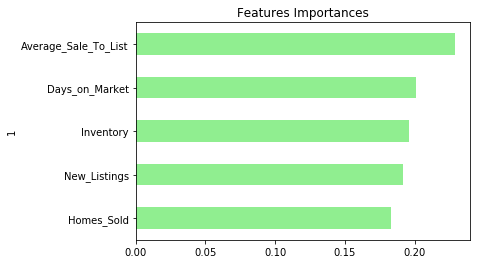

In [108]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


# High std 1

In [109]:
laurelhurst_df = neighborhood_df.loc[neighborhood_df.index == " Laurelhurst"]
laurelhurst_df.head()

,Month_of_Period_End,Median_Sale_Price,Median_Sale_Price_MoM,Median_Sale_Price_YoY,Homes_Sold,Homes_Sold_MoM,Homes_Sold_YoY,New_Listings,New_Listings_MoM,New_Listings_YoY,Inventory,Inventory_MoM,Inventory_YoY,Days_on_Market,Days_on_Market_MoM,Days_on_Market_YoY,Average_Sale_To_List,Average_Sale_To_List_MoM,Average_Sale_To_List_YoY
Region,,,,,,,,,,,,,,,,,,,
Laurelhurst,February 2012,864,2.9,-1.1,10,-16.7,-9.1,8,-11.1,-27.3,9,12.5,-25.0,32.0,5.0,-76.0,97.6,0.9,1.6
Laurelhurst,March 2012,953,10.3,9.0,10,0.0,11.1,12,50.0,-40.0,10,11.1,-28.6,90.0,58.0,-19.0,95.6,-2.0,3.1
Laurelhurst,April 2012,1013,6.3,18.4,8,-20.0,-57.9,19,58.3,-20.8,14,40.0,7.7,64.0,-26.0,8.0,94.4,-1.2,-2.0
Laurelhurst,May 2012,886,-12.5,11.4,9,12.5,-50.0,21,10.5,-22.2,15,7.1,-16.7,72.0,8.0,43.0,95.2,0.8,-2.9
Laurelhurst,June 2012,738,-16.8,-7.2,11,22.2,-45.0,21,0.0,-16.0,15,0.0,-31.8,30.0,-42.0,21.0,98.0,2.8,-1.5


In [110]:
laurelhurst_df['Month_of_Period_End'] = pd.to_datetime(laurelhurst_df['Month_of_Period_End'], infer_datetime_format=True)

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


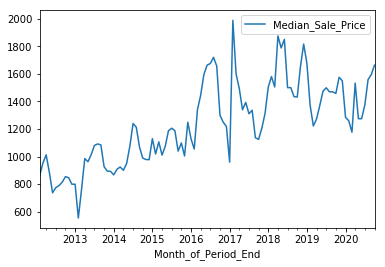

In [111]:
laurelhurst_df.plot(y="Median_Sale_Price", x="Month_of_Period_End", kind="line")

In [112]:
adfuller(laurelhurst_df.Median_Sale_Price)

(-2.95278851866222,
 0.039544807756693945,
 0,
 104,
 {'1%': -3.4948504603223145,
  '5%': -2.889758398668639,
  '10%': -2.5818220155325444},
 1193.0531672015927)

In [113]:
laurelhurst_df['Returns'] = laurelhurst_df.Median_Sale_Price.pct_change()
laurelhurst_df = laurelhurst_df.dropna()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
train = laurelhurst_df.iloc[:94,:] 
test = laurelhurst_df.iloc[95:,:]

Comparison_h1 = pd.DataFrame()
#Comparison.index = test.index
Comparison_h1["Original"] = (test.loc[:, 'Returns'])
Returns = train.loc[:, 'Returns']
Comparison_h1

,Original
Region,
Laurelhurst,-0.019455
Laurelhurst,-0.065873
Laurelhurst,0.302464
Laurelhurst,-0.168297
Laurelhurst,0.000000
Laurelhurst,0.078431
Laurelhurst,0.133091
Laurelhurst,0.023748
Laurelhurst,0.042633


In [115]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(Returns.values, order=(1,1))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:                     ARMA(1, 1)   Log Likelihood                  50.069
Method:                       css-mle   S.D. of innovations              0.140
Date:                Fri, 04 Dec 2020   AIC                            -92.139
Time:                        23:34:53   BIC                            -81.966
Sample:                             0   HQIC                           -88.030
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0186      0.001     14.508      0.000       0.016       0.021
ar.L1.y        0.6102      0.084      7.244      0.000       0.445       0.775
ma.L1.y       -1.0000      0.033    -30.240      0.000      -1.065      -0.935
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6387           +0.0000j            1.6387            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [116]:
predicted_arma = results.forecast(steps=9)[0]
Comparison_h1["Arma"] = predicted_arma
Comparison_h1

,Original,Arma
Region,,
Laurelhurst,-0.019455,0.070194
Laurelhurst,-0.065873,0.050074
Laurelhurst,0.302464,0.037796
Laurelhurst,-0.168297,0.030303
Laurelhurst,0.000000,0.025731
Laurelhurst,0.078431,0.022941
Laurelhurst,0.133091,0.021238
Laurelhurst,0.023748,0.020199
Laurelhurst,0.042633,0.019565


In [117]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Returns, order=(1, 1, 1))
results = model.fit()
results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Returns   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  39.432
Method:                       css-mle   S.D. of innovations              0.154
Date:                Fri, 04 Dec 2020   AIC                            -70.864
Time:                        23:34:53   BIC                            -60.734
Sample:                             1   HQIC                           -66.774
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.256e-06      0.001     -0.002      0.998      -0.001       0.001
ar.L1.D.Returns    -0.1669      0.102     -1.635      0.102      -0.367       0.033
ma.L1.D.Returns    -1.0000      0.028    -35.804      0.000      -1.055      -0.945
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.9923           +0.0000j            5.9923            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [118]:
predicted_arima = results.forecast(steps=9)[0]
Comparison_h1["Arima"] = predicted_arma
Comparison_h1

,Original,Arma,Arima
Region,,,
Laurelhurst,-0.019455,0.070194,0.070194
Laurelhurst,-0.065873,0.050074,0.050074
Laurelhurst,0.302464,0.037796,0.037796
Laurelhurst,-0.168297,0.030303,0.030303
Laurelhurst,0.000000,0.025731,0.025731
Laurelhurst,0.078431,0.022941,0.022941
Laurelhurst,0.133091,0.021238,0.021238
Laurelhurst,0.023748,0.020199,0.020199
Laurelhurst,0.042633,0.019565,0.019565


In [119]:
from arch import arch_model
model = arch_model(Returns, mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0243. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:                57.2161
Distribution:                  Normal   AIC:                          -108.432
Method:            Maximum Likelihood   BIC:                          -100.802
                                        No. Observations:                   94
Date:                Fri, Dec 04 2020   Df Residuals:                       91
Time:                        23:34:54   Df Model:                            3
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      9.3084e-03  2.651e-03      3.511  4.467e-04 [4.112e-03,1.450e-02]
alpha[1]       0.9828      0.679      1.448      0.148     [ -0.348,  2.314]
beta[1]    2.2647e-09  6.200e-02  3.653e-08      1.000     [ -0.122,  0.122]
============================================================================

Covariance estimator: robust
"""

In [120]:
import numpy as np

forecast_horizon = 9
garch = res.forecast(horizon=forecast_horizon)
intermediate = np.sqrt(garch.variance.dropna() * 252)
final = intermediate.dropna().T
final.columns = ["Garch"]
final.index = Comparison_h1.index
Comparison_h1["Garch"] = final["Garch"]

In [121]:
Comparison_h1

,Original,Arma,Arima,Garch
Region,,,,
Laurelhurst,-0.019455,0.070194,0.070194,1.551812
Laurelhurst,-0.065873,0.050074,0.050074,2.170832
Laurelhurst,0.302464,0.037796,0.037796,2.641468
Laurelhurst,-0.168297,0.030303,0.030303,3.033699
Laurelhurst,0.000000,0.025731,0.025731,3.375070
Laurelhurst,0.078431,0.022941,0.022941,3.679854
Laurelhurst,0.133091,0.021238,0.021238,3.956595
Laurelhurst,0.023748,0.020199,0.020199,4.210903
Laurelhurst,0.042633,0.019565,0.019565,4.446696


In [122]:
X = laurelhurst_df[["Homes_Sold", "New_Listings","Inventory", "Days_on_Market", "Average_Sale_To_List" ]].copy()
y = laurelhurst_df["Median_Sale_Price"].ravel()
y[:5]

array([ 953, 1013,  886,  738,  775], dtype=int64)

In [123]:
xtrain = X.iloc[:94,:] 
xtest = X.iloc[95:,:]

ytrain = y[0:94]
ytest = y[95::]

xtest

,Homes_Sold,New_Listings,Inventory,Days_on_Market,Average_Sale_To_List
Region,,,,,
Laurelhurst,11,13,6,61.0,98.2
Laurelhurst,12,18,7,24.0,99.7
Laurelhurst,12,23,11,6.0,100.7
Laurelhurst,13,23,9,6.0,99.6
Laurelhurst,19,22,9,10.0,97.3
Laurelhurst,21,21,8,10.0,96.4
Laurelhurst,24,27,11,18.0,96.9
Laurelhurst,27,38,12,13.0,98.4
Laurelhurst,30,38,12,10.0,98.5


In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [125]:
X_scaler = scaler.fit(xtrain)
X_train_scaled = X_scaler.transform(xtrain)
X_test_scaled = X_scaler.transform(xtest)

In [126]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, ytrain)
predictions = rf_model.predict(X_test_scaled)

In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
importances = rf_model.feature_importances_

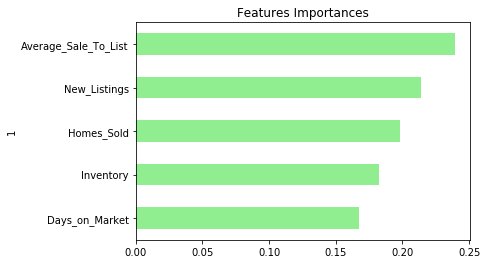

In [128]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


# high std 2

In [129]:
madisonpark_df = neighborhood_df.loc[neighborhood_df.index == " Madison Park"]
madisonpark_df.head()

,Month_of_Period_End,Median_Sale_Price,Median_Sale_Price_MoM,Median_Sale_Price_YoY,Homes_Sold,Homes_Sold_MoM,Homes_Sold_YoY,New_Listings,New_Listings_MoM,New_Listings_YoY,Inventory,Inventory_MoM,Inventory_YoY,Days_on_Market,Days_on_Market_MoM,Days_on_Market_YoY,Average_Sale_To_List,Average_Sale_To_List_MoM,Average_Sale_To_List_YoY
Region,,,,,,,,,,,,,,,,,,,
Madison Park,February 2012,1038,3.8,15.3,21,-8.7,-8.7,25,8.7,56.3,35,-2.8,-30.0,130.0,-40.0,48.0,91.5,-1.5,-1.5
Madison Park,March 2012,994,-4.2,36.1,18,-14.3,-14.3,39,56.0,56.0,42,20.0,-22.2,94.0,-36.0,-30.0,92.7,1.2,0.8
Madison Park,April 2012,1225,23.3,59.3,23,27.8,15.0,47,20.5,20.5,44,4.8,-30.2,78.0,-17.0,-126.0,94.3,1.6,2.7
Madison Park,May 2012,872,-28.8,8.2,32,39.1,23.1,58,23.4,5.5,56,27.3,-21.1,45.0,-33.0,-149.0,96.3,2.0,2.6
Madison Park,June 2012,840,-3.7,-19.7,32,0.0,39.1,53,-8.6,-5.4,61,8.9,-9.0,20.0,-26.0,-141.0,96.9,0.7,3.6


In [130]:
madisonpark_df['Month_of_Period_End'] = pd.to_datetime(madisonpark_df['Month_of_Period_End'], infer_datetime_format=True)

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


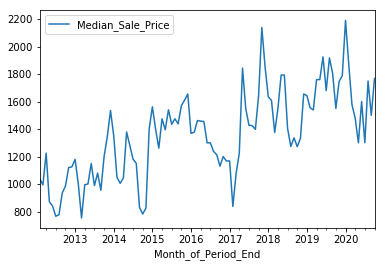

In [131]:
madisonpark_df.plot(y="Median_Sale_Price", x="Month_of_Period_End", kind="line")

In [132]:
adfuller(madisonpark_df.Median_Sale_Price)

(-1.9390312863332095,
 0.31392809436925534,
 4,
 100,
 {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349},
 1214.1208699417962)

In [133]:
madisonpark_df['Returns'] = madisonpark_df.Median_Sale_Price.pct_change()
madisonpark_df = madisonpark_df.dropna()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
train = madisonpark_df.iloc[:94,:] 
test = madisonpark_df.iloc[95:,:]

Comparison_h2 = pd.DataFrame()
#Comparison.index = test.index
Comparison_h2["Original"] = (test.loc[:, 'Returns'])
Returns = train.loc[:, 'Returns']
Comparison_h2

,Original
Region,
Madison Park,-0.146052
Madison Park,-0.156601
Madison Park,-0.062104
Madison Park,-0.121622
Madison Park,0.230769
Madison Park,-0.187500
Madison Park,0.346154
Madison Park,-0.142857
Madison Park,0.178667


In [135]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(Returns.values, order=(1,1))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:                     ARMA(1, 1)   Log Likelihood                  46.976
Method:                       css-mle   S.D. of innovations              0.145
Date:                Fri, 04 Dec 2020   AIC                            -85.952
Time:                        23:34:57   BIC                            -75.779
Sample:                             0   HQIC                           -81.843
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0182      0.002     11.433      0.000       0.015       0.021
ar.L1.y        0.6818      0.078      8.796      0.000       0.530       0.834
ma.L1.y       -1.0000      0.030    -32.891      0.000      -1.060      -0.940
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4667           +0.0000j            1.4667            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [136]:
predicted_arma = results.forecast(steps=9)[0]
Comparison_h2["Arma"] = predicted_arma
Comparison_h2

,Original,Arma
Region,,
Madison Park,-0.146052,0.036308
Madison Park,-0.156601,0.030544
Madison Park,-0.062104,0.026614
Madison Park,-0.121622,0.023934
Madison Park,0.230769,0.022107
Madison Park,-0.187500,0.020861
Madison Park,0.346154,0.020012
Madison Park,-0.142857,0.019433
Madison Park,0.178667,0.019038


In [137]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Returns, order=(1, 1, 1))
results = model.fit()
results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Returns   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  36.858
Method:                       css-mle   S.D. of innovations              0.159
Date:                Fri, 04 Dec 2020   AIC                            -65.716
Time:                        23:34:58   BIC                            -55.586
Sample:                             1   HQIC                           -61.626
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.113e-05      0.001     -0.036      0.972      -0.001       0.001
ar.L1.D.Returns    -0.0196      0.104     -0.189      0.850      -0.223       0.184
ma.L1.D.Returns    -0.9999      0.027    -36.404      0.000      -1.054      -0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -51.0206           +0.0000j           51.0206            0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [138]:
predicted_arima = results.forecast(steps=9)[0]
Comparison_h2["Arima"] = predicted_arma
Comparison_h2

,Original,Arma,Arima
Region,,,
Madison Park,-0.146052,0.036308,0.036308
Madison Park,-0.156601,0.030544,0.030544
Madison Park,-0.062104,0.026614,0.026614
Madison Park,-0.121622,0.023934,0.023934
Madison Park,0.230769,0.022107,0.022107
Madison Park,-0.187500,0.020861,0.020861
Madison Park,0.346154,0.020012,0.020012
Madison Park,-0.142857,0.019433,0.019433
Madison Park,0.178667,0.019038,0.019038


In [139]:
from arch import arch_model
model = arch_model(Returns, mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02498. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:                40.0808
Distribution:                  Normal   AIC:                          -74.1615
Method:            Maximum Likelihood   BIC:                          -66.5316
                                        No. Observations:                   94
Date:                Fri, Dec 04 2020   Df Residuals:                       91
Time:                        23:34:58   Df Model:                            3
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0000  6.311e-04      0.000      1.000 [-1.237e-03,1.237e-03]
alpha[1]   1.1620e-09  1.529e-02  7.597e-08      1.000 [-2.998e-02,2.998e-02]
beta[1]        0.9964  2.080e-02     47.908      0.000      [  0.956,  1.037]
=============================================================================

Covariance estimator: robust
"""

In [140]:
import numpy as np

forecast_horizon = 9
garch = res.forecast(horizon=forecast_horizon)
intermediate = np.sqrt(garch.variance.dropna() * 252)
final = intermediate.dropna().T
final.columns = ["Garch"]
final.index = Comparison_h2.index
Comparison_h2["Garch"] = final["Garch"]

In [141]:
Comparison_h2

,Original,Arma,Arima,Garch
Region,,,,
Madison Park,-0.146052,0.036308,0.036308,2.222449
Madison Park,-0.156601,0.030544,0.030544,2.218406
Madison Park,-0.062104,0.026614,0.026614,2.214371
Madison Park,-0.121622,0.023934,0.023934,2.210343
Madison Park,0.230769,0.022107,0.022107,2.206323
Madison Park,-0.187500,0.020861,0.020861,2.202310
Madison Park,0.346154,0.020012,0.020012,2.198304
Madison Park,-0.142857,0.019433,0.019433,2.194305
Madison Park,0.178667,0.019038,0.019038,2.190314


In [142]:
X = madisonpark_df[["Homes_Sold", "New_Listings","Inventory", "Days_on_Market", "Average_Sale_To_List" ]].copy()
y = madisonpark_df["Median_Sale_Price"].ravel()
y[:5]

array([ 994, 1225,  872,  840,  766], dtype=int64)

In [143]:
xtrain = X.iloc[:94,:] 
xtest = X.iloc[95:,:]

ytrain = y[0:94]
ytest = y[95::]

xtest

,Homes_Sold,New_Listings,Inventory,Days_on_Market,Average_Sale_To_List
Region,,,,,
Madison Park,18,16,10,76.0,97.2
Madison Park,18,30,22,16.0,99.1
Madison Park,18,28,16,7.0,100.8
Madison Park,19,36,21,8.0,99.9
Madison Park,24,34,21,11.0,99.6
Madison Park,29,51,24,25.0,101.1
Madison Park,35,57,29,7.0,101.3
Madison Park,40,63,35,9.0,101.1
Madison Park,44,53,26,8.0,99.5


In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [145]:
X_scaler = scaler.fit(xtrain)
X_train_scaled = X_scaler.transform(xtrain)
X_test_scaled = X_scaler.transform(xtest)

In [146]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, ytrain)
predictions = rf_model.predict(X_test_scaled)

In [147]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
importances = rf_model.feature_importances_

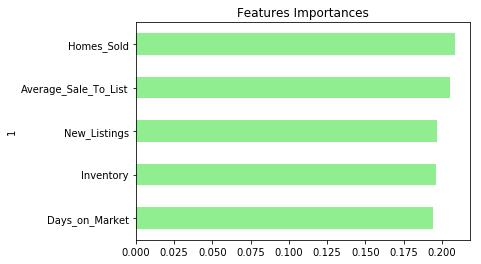

In [148]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


# High std 3

In [149]:
portagebay_df = neighborhood_df.loc[neighborhood_df.index == " Portage Bay"]
portagebay_df.head()

,Month_of_Period_End,Median_Sale_Price,Median_Sale_Price_MoM,Median_Sale_Price_YoY,Homes_Sold,Homes_Sold_MoM,Homes_Sold_YoY,New_Listings,New_Listings_MoM,New_Listings_YoY,Inventory,Inventory_MoM,Inventory_YoY,Days_on_Market,Days_on_Market_MoM,Days_on_Market_YoY,Average_Sale_To_List,Average_Sale_To_List_MoM,Average_Sale_To_List_YoY
Region,,,,,,,,,,,,,,,,,,,
Portage Bay,February 2012,727,6.9,13.9,2,0.0,-33.3,4,300.0,33.3,3,0.0,-50.0,210.0,93.0,175.0,95.3,-3.5,-2.1
Portage Bay,March 2012,705,-3.0,10.5,4,100.0,-42.9,11,175.0,266.7,6,100.0,0.0,18.0,-192.0,-108.0,94.2,-1.1,0.5
Portage Bay,April 2012,761,7.9,15.4,5,25.0,-37.5,12,9.1,200.0,6,0.0,-25.0,16.0,-2.0,-122.0,95.0,0.8,1.4
Portage Bay,May 2012,743,-2.3,34.0,8,60.0,0.0,11,-8.3,37.5,3,-50.0,-50.0,14.0,-2.0,-124.0,100.7,5.7,6.5
Portage Bay,June 2012,761,2.4,29.9,5,-37.5,-16.7,7,-36.4,-30.0,5,66.7,-28.6,12.0,-2.0,6.0,102.8,2.1,5.0


In [150]:
portagebay_df['Month_of_Period_End'] = pd.to_datetime(portagebay_df['Month_of_Period_End'], infer_datetime_format=True)

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


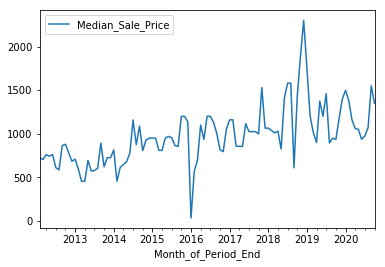

In [151]:
portagebay_df.plot(y="Median_Sale_Price", x="Month_of_Period_End", kind="line")

In [152]:
adfuller(portagebay_df.Median_Sale_Price)

(-1.6399896322584808,
 0.46226621027576614,
 6,
 98,
 {'1%': -3.4989097606014496,
  '5%': -2.891516256916761,
  '10%': -2.5827604414827157},
 1259.0397225443028)

In [153]:
portagebay_df['Returns'] = portagebay_df.Median_Sale_Price.pct_change()
portagebay_df = portagebay_df.dropna()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [154]:
train = portagebay_df.iloc[:94,:] 
test = portagebay_df.iloc[95:,:]

Comparison_h3 = pd.DataFrame()
#Comparison.index = test.index
Comparison_h3["Original"] = (test.loc[:, 'Returns'])
Returns = train.loc[:, 'Returns']
Comparison_h3

,Original
Region,
Portage Bay,-0.078772
Portage Bay,-0.158696
Portage Bay,-0.086994
Portage Bay,-0.009434
Portage Bay,-0.107619
Portage Bay,0.040555
Portage Bay,0.097436
Portage Bay,0.448598
Portage Bay,-0.129032


In [155]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(Returns.values, order=(1,1))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:                     ARMA(1, 1)   Log Likelihood                -176.395
Method:                       css-mle   S.D. of innovations              1.580
Date:                Fri, 04 Dec 2020   AIC                            360.791
Time:                        23:35:02   BIC                            370.964
Sample:                             0   HQIC                           364.900
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1978      0.157      1.258      0.208      -0.110       0.506
ar.L1.y       -0.6340      0.863     -0.735      0.463      -2.326       1.058
ma.L1.y        0.5758      0.914      0.630      0.529      -1.215       2.367
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5772           +0.0000j            1.5772            0.5000
MA.1           -1.7368           +0.0000j            1.7368            0.5000
-----------------------------------------------------------------------------
"""

In [156]:
predicted_arma = results.forecast(steps=9)[0]
Comparison_h3["Arma"] = predicted_arma
Comparison_h3

,Original,Arma
Region,,
Portage Bay,-0.078772,0.207728
Portage Bay,-0.158696,0.191470
Portage Bay,-0.086994,0.201778
Portage Bay,-0.009434,0.195242
Portage Bay,-0.107619,0.199386
Portage Bay,0.040555,0.196759
Portage Bay,0.097436,0.198425
Portage Bay,0.448598,0.197368
Portage Bay,-0.129032,0.198038


In [157]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Returns, order=(1, 1, 1))
results = model.fit()
results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Returns   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -177.392
Method:                       css-mle   S.D. of innovations              1.590
Date:                Fri, 04 Dec 2020   AIC                            362.784
Time:                        23:35:02   BIC                            372.915
Sample:                             1   HQIC                           366.875
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0007      0.006      0.125      0.901      -0.010       0.012
ar.L1.D.Returns    -0.0580      0.103     -0.561      0.575      -0.261       0.145
ma.L1.D.Returns    -1.0000      0.037    -27.201      0.000      -1.072      -0.928
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -17.2403           +0.0000j           17.2403            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [158]:
predicted_arima = results.forecast(steps=9)[0]
Comparison_h3["Arima"] = predicted_arma
Comparison_h3

,Original,Arma,Arima
Region,,,
Portage Bay,-0.078772,0.207728,0.207728
Portage Bay,-0.158696,0.191470,0.191470
Portage Bay,-0.086994,0.201778,0.201778
Portage Bay,-0.009434,0.195242,0.195242
Portage Bay,-0.107619,0.199386,0.199386
Portage Bay,0.040555,0.196759,0.196759
Portage Bay,0.097436,0.198425,0.198425
Portage Bay,0.448598,0.197368,0.197368
Portage Bay,-0.129032,0.198038,0.198038


In [159]:
from arch import arch_model
model = arch_model(Returns, mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:               -171.446
Distribution:                  Normal   AIC:                           348.891
Method:            Maximum Likelihood   BIC:                           356.521
                                        No. Observations:                   94
Date:                Fri, Dec 04 2020   Df Residuals:                       91
Time:                        23:35:02   Df Model:                            3
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0959  1.726e-02      5.556  2.754e-08    [6.208e-02,  0.130]
alpha[1]       0.0000  5.508e-03      0.000      1.000 [-1.080e-02,1.080e-02]
beta[1]        0.9726  4.087e-02     23.796 3.647e-125      [  0.893,  1.053]
=============================================================================

Covariance estimator: robust
"""

In [160]:
import numpy as np

forecast_horizon = 9
garch = res.forecast(horizon=forecast_horizon)
intermediate = np.sqrt(garch.variance.dropna() * 252)
final = intermediate.dropna().T
final.columns = ["Garch"]
final.index = Comparison_h3.index
Comparison_h3["Garch"] = final["Garch"]

In [161]:
Comparison_h3

,Original,Arma,Arima,Garch
Region,,,,
Portage Bay,-0.078772,0.207728,0.207728,28.885942
Portage Bay,-0.158696,0.191470,0.191470,28.908932
Portage Bay,-0.086994,0.201778,0.201778,28.931276
Portage Bay,-0.009434,0.195242,0.195242,28.952992
Portage Bay,-0.107619,0.199386,0.199386,28.974098
Portage Bay,0.040555,0.196759,0.196759,28.994611
Portage Bay,0.097436,0.198425,0.198425,29.014548
Portage Bay,0.448598,0.197368,0.197368,29.033927
Portage Bay,-0.129032,0.198038,0.198038,29.052763


In [162]:
X = portagebay_df[["Homes_Sold", "New_Listings","Inventory", "Days_on_Market", "Average_Sale_To_List" ]].copy()
y = portagebay_df["Median_Sale_Price"].ravel()
y[:5]

array([705, 761, 743, 761, 613], dtype=int64)

In [163]:
xtrain = X.iloc[:94,:] 
xtest = X.iloc[95:,:]

ytrain = y[0:94]
ytest = y[95::]

xtest

,Homes_Sold,New_Listings,Inventory,Days_on_Market,Average_Sale_To_List
Region,,,,,
Portage Bay,2,5,3,97.0,102.6
Portage Bay,4,9,7,8.0,101.5
Portage Bay,5,7,6,8.0,101.3
Portage Bay,5,6,5,25.0,100.1
Portage Bay,6,4,2,61.0,97.9
Portage Bay,7,5,2,46.0,99.2
Portage Bay,9,5,3,61.0,98.8
Portage Bay,5,4,3,36.0,100.3
Portage Bay,5,5,2,36.0,100.6


In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [165]:
X_scaler = scaler.fit(xtrain)
X_train_scaled = X_scaler.transform(xtrain)
X_test_scaled = X_scaler.transform(xtest)

In [166]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, ytrain)
predictions = rf_model.predict(X_test_scaled)

In [167]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
importances = rf_model.feature_importances_

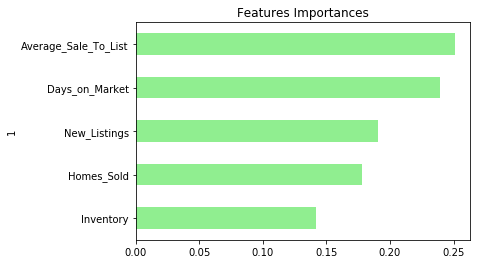

In [168]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


# High std 4

In [169]:
seattlecentralbusinessdistrict_df = neighborhood_df.loc[neighborhood_df.index == " Seattle Central Business District"]
seattlecentralbusinessdistrict_df.head()

,Month_of_Period_End,Median_Sale_Price,Median_Sale_Price_MoM,Median_Sale_Price_YoY,Homes_Sold,Homes_Sold_MoM,Homes_Sold_YoY,New_Listings,New_Listings_MoM,New_Listings_YoY,Inventory,Inventory_MoM,Inventory_YoY,Days_on_Market,Days_on_Market_MoM,Days_on_Market_YoY,Average_Sale_To_List,Average_Sale_To_List_MoM,Average_Sale_To_List_YoY
Region,,,,,,,,,,,,,,,,,,,
Seattle Central Business District,February 2012,362,0.0,-25.4,4,0.0,0.0,1,0.0,-66.7,7,0.0,-63.2,182.0,0.0,-21.0,92.4,0.0,-3.6
Seattle Central Business District,March 2012,290,-19.9,-40.2,1,-75.0,-75.0,4,300.0,-42.9,9,28.6,-60.9,237.0,55.0,-100.0,86.6,-5.8,-6.3
Seattle Central Business District,April 2012,485,67.2,23.9,1,0.0,-75.0,6,50.0,-40.0,7,-22.2,-69.6,354.0,117.0,18.0,97.2,10.6,3.6
Seattle Central Business District,May 2012,442,-8.9,18.2,5,400.0,25.0,9,50.0,-35.7,8,14.3,-66.7,354.0,0.0,215.0,96.0,-1.2,4.7
Seattle Central Business District,June 2012,442,0.0,0.5,7,40.0,40.0,19,111.1,46.2,18,125.0,-28.0,67.0,-287.0,33.0,96.0,0.0,0.6


In [170]:
seattlecentralbusinessdistrict_df['Month_of_Period_End'] = pd.to_datetime(seattlecentralbusinessdistrict_df['Month_of_Period_End'], infer_datetime_format=True)

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


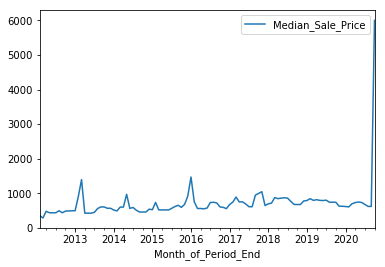

In [171]:
seattlecentralbusinessdistrict_df.plot(y="Median_Sale_Price", x="Month_of_Period_End", kind="line")

In [172]:
adfuller(seattlecentralbusinessdistrict_df.Median_Sale_Price)

(-1.8142448535705582,
 0.3734128036480285,
 0,
 104,
 {'1%': -3.4948504603223145,
  '5%': -2.889758398668639,
  '10%': -2.5818220155325444},
 1418.6080531170487)

In [173]:
seattlecentralbusinessdistrict_df['Returns'] = seattlecentralbusinessdistrict_df.Median_Sale_Price.pct_change()
seattlecentralbusinessdistrict_df = seattlecentralbusinessdistrict_df.dropna()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [174]:
train = seattlecentralbusinessdistrict_df.iloc[:94,:] 
test = seattlecentralbusinessdistrict_df.iloc[95:,:]

Comparison_h4 = pd.DataFrame()
#Comparison.index = test.index
Comparison_h4["Original"] = (test.loc[:, 'Returns'])
Returns = train.loc[:, 'Returns']
Comparison_h4

,Original
Region,
Seattle Central Business District,-0.019293
Seattle Central Business District,0.149180
Seattle Central Business District,0.048502
Seattle Central Business District,0.023129
Seattle Central Business District,-0.017287
Seattle Central Business District,-0.074425
Seattle Central Business District,-0.086257
Seattle Central Business District,0.000000
Seattle Central Business District,8.600000


In [175]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(Returns.values, order=(1,1))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:                     ARMA(1, 1)   Log Likelihood                   9.324
Method:                       css-mle   S.D. of innovations              0.219
Date:                Fri, 04 Dec 2020   AIC                            -10.647
Time:                        23:35:06   BIC                             -0.474
Sample:                             0   HQIC                            -6.538
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0306      0.022      1.406      0.160      -0.012       0.073
ar.L1.y       -0.7294      0.494     -1.475      0.140      -1.699       0.240
ma.L1.y        0.6666      0.532      1.254      0.210      -0.376       1.709
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3710           +0.0000j            1.3710            0.5000
MA.1           -1.5002           +0.0000j            1.5002            0.5000
-----------------------------------------------------------------------------
"""

In [176]:
predicted_arma = results.forecast(steps=9)[0]
Comparison_h4["Arma"] = predicted_arma
Comparison_h4

,Original,Arma
Region,,
Seattle Central Business District,-0.019293,0.026535
Seattle Central Business District,0.149180,0.033600
Seattle Central Business District,0.048502,0.028447
Seattle Central Business District,0.023129,0.032206
Seattle Central Business District,-0.017287,0.029464
Seattle Central Business District,-0.074425,0.031464
Seattle Central Business District,-0.086257,0.030005
Seattle Central Business District,0.000000,0.031069
Seattle Central Business District,8.600000,0.030293


In [177]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Returns, order=(1, 0, 1))
results = model.fit()
results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                   94
Model:                     ARMA(1, 1)   Log Likelihood                   9.324
Method:                       css-mle   S.D. of innovations              0.219
Date:                Fri, 04 Dec 2020   AIC                            -10.647
Time:                        23:35:06   BIC                             -0.474
Sample:                             0   HQIC                            -6.538
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0306      0.022      1.406      0.160      -0.012       0.073
ar.L1.Returns    -0.7294      0.494     -1.475      0.140      -1.699       0.240
ma.L1.Returns     0.6666      0.532      1.254      0.210      -0.376       1.709
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3710           +0.0000j            1.3710            0.5000
MA.1           -1.5002           +0.0000j            1.5002            0.5000
-----------------------------------------------------------------------------
"""

In [178]:
predicted_arima = results.forecast(steps=9)[0]
Comparison_h4["Arima"] = predicted_arma
Comparison_h4

,Original,Arma,Arima
Region,,,
Seattle Central Business District,-0.019293,0.026535,0.026535
Seattle Central Business District,0.149180,0.033600,0.033600
Seattle Central Business District,0.048502,0.028447,0.028447
Seattle Central Business District,0.023129,0.032206,0.032206
Seattle Central Business District,-0.017287,0.029464,0.029464
Seattle Central Business District,-0.074425,0.031464,0.031464
Seattle Central Business District,-0.086257,0.030005,0.030005
Seattle Central Business District,0.000000,0.031069,0.031069
Seattle Central Business District,8.600000,0.030293,0.030293


In [179]:
from arch import arch_model
model = arch_model(Returns, mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.04838. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:                13.5259
Distribution:                  Normal   AIC:                          -21.0519
Method:            Maximum Likelihood   BIC:                          -13.4220
                                        No. Observations:                   94
Date:                Fri, Dec 04 2020   Df Residuals:                       91
Time:                        23:35:06   Df Model:                            3
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0354  2.213e-02      1.599      0.110 [-7.979e-03,7.875e-02]
alpha[1]       0.2696      0.212      1.271      0.204      [ -0.146,  0.685]
beta[1]    7.2144e-15      0.424  1.701e-14      1.000      [ -0.831,  0.831]
=============================================================================

Covariance estimator: robust
"""

In [180]:
import numpy as np

forecast_horizon = 9
garch = res.forecast(horizon=forecast_horizon)
intermediate = np.sqrt(garch.variance.dropna() * 252)
final = intermediate.dropna().T
final.columns = ["Garch"]
final.index = Comparison_h4.index
Comparison_h4["Garch"] = final["Garch"]

In [181]:
Comparison_h4

,Original,Arma,Arima,Garch
Region,,,,
Seattle Central Business District,-0.019293,0.026535,0.026535,2.986441
Seattle Central Business District,0.149180,0.033600,0.033600,3.364750
Seattle Central Business District,0.048502,0.028447,0.028447,3.459659
Seattle Central Business District,0.023129,0.032206,0.032206,3.484801
Seattle Central Business District,-0.017287,0.029464,0.029464,3.491547
Seattle Central Business District,-0.074425,0.031464,0.031464,3.493364
Seattle Central Business District,-0.086257,0.030005,0.030005,3.493853
Seattle Central Business District,0.000000,0.031069,0.031069,3.493985
Seattle Central Business District,8.600000,0.030293,0.030293,3.494021


In [182]:
X = seattlecentralbusinessdistrict_df[["Homes_Sold", "New_Listings","Inventory", "Days_on_Market", "Average_Sale_To_List" ]].copy()
y = seattlecentralbusinessdistrict_df["Median_Sale_Price"].ravel()
y[:5]

array([290, 485, 442, 442, 442], dtype=int64)

In [183]:
xtrain = X.iloc[:94,:] 
xtest = X.iloc[95:,:]

ytrain = y[0:94]
ytest = y[95::]

xtest

,Homes_Sold,New_Listings,Inventory,Days_on_Market,Average_Sale_To_List
Region,,,,,
Seattle Central Business District,6,11,9,91.0,96.5
Seattle Central Business District,12,14,8,14.0,98.8
Seattle Central Business District,13,14,10,16.0,99.1
Seattle Central Business District,11,8,8,10.0,99.2
Seattle Central Business District,4,13,14,64.0,98.0
Seattle Central Business District,4,12,14,41.0,97.6
Seattle Central Business District,5,18,20,73.0,94.7
Seattle Central Business District,5,17,22,40.0,94.2
Seattle Central Business District,5,20,21,40.0,93.3


In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [185]:
X_scaler = scaler.fit(xtrain)
X_train_scaled = X_scaler.transform(xtrain)
X_test_scaled = X_scaler.transform(xtest)

In [186]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, ytrain)
predictions = rf_model.predict(X_test_scaled)

In [187]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
importances = rf_model.feature_importances_

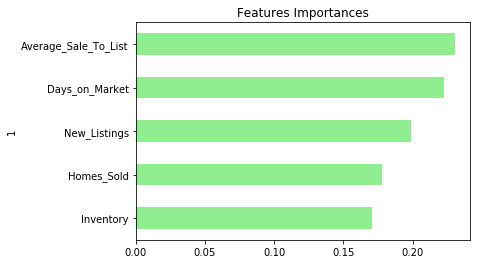

In [188]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


# high std 5

In [189]:
dennyblaine_df = neighborhood_df.loc[neighborhood_df.index == " Denny Blaine"]
dennyblaine_df.head()

,Month_of_Period_End,Median_Sale_Price,Median_Sale_Price_MoM,Median_Sale_Price_YoY,Homes_Sold,Homes_Sold_MoM,Homes_Sold_YoY,New_Listings,New_Listings_MoM,New_Listings_YoY,Inventory,Inventory_MoM,Inventory_YoY,Days_on_Market,Days_on_Market_MoM,Days_on_Market_YoY,Average_Sale_To_List,Average_Sale_To_List_MoM,Average_Sale_To_List_YoY
Region,,,,,,,,,,,,,,,,,,,
Denny Blaine,February 2012,1148,-18.0,-2.3,3,-40.0,-72.7,5,0.0,-16.7,7,-22.2,-56.3,70.0,0.0,-20.0,92.9,1.0,0.8
Denny Blaine,March 2012,1438,25.3,25.0,6,100.0,20.0,16,220.0,6.7,17,142.9,-22.7,39.0,-32.0,-86.0,97.1,4.2,3.8
Denny Blaine,April 2012,1438,0.0,17.3,6,0.0,50.0,18,12.5,-18.2,17,0.0,-39.3,39.0,0.0,-272.0,97.1,0.0,4.6
Denny Blaine,May 2012,1398,-2.8,21.5,8,33.3,-27.3,26,44.4,8.3,23,35.3,-4.2,22.0,-17.0,-138.0,97.5,0.5,1.4
Denny Blaine,June 2012,1138,-18.6,-15.5,6,-25.0,-53.8,18,-30.8,-10.0,24,4.3,9.1,8.0,-14.0,-88.0,96.0,-1.5,2.3


In [190]:
dennyblaine_df['Month_of_Period_End'] = pd.to_datetime(dennyblaine_df['Month_of_Period_End'], infer_datetime_format=True)

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


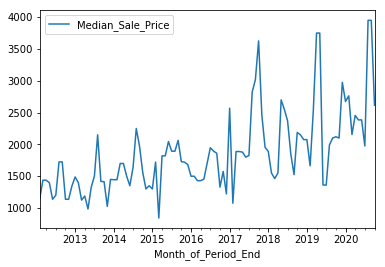

In [191]:
dennyblaine_df.plot(y="Median_Sale_Price", x="Month_of_Period_End", kind="line")

In [192]:
adfuller(dennyblaine_df.Median_Sale_Price)

(-0.6221719303729878,
 0.8658929665460824,
 8,
 96,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446},
 1396.2157235992831)

In [193]:
dennyblaine_df['Returns'] = dennyblaine_df.Median_Sale_Price.pct_change()
dennyblaine_df = dennyblaine_df.dropna()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [194]:
train = dennyblaine_df.iloc[:94,:] 
test = dennyblaine_df.iloc[95:,:]

Comparison_h5 = pd.DataFrame()
#Comparison.index = test.index
Comparison_h5["Original"] = (test.loc[:, 'Returns'])
Returns = train.loc[:, 'Returns']
Comparison_h5

,Original
Region,
Denny Blaine,0.032897
Denny Blaine,-0.220051
Denny Blaine,0.139211
Denny Blaine,-0.028513
Denny Blaine,0.000000
Denny Blaine,-0.171908
Denny Blaine,1.000000
Denny Blaine,0.000000
Denny Blaine,-0.337975


In [195]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(Returns.values, order=(1,1))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:                     ARMA(1, 1)   Log Likelihood                  -9.725
Method:                       css-mle   S.D. of innovations              0.264
Date:                Fri, 04 Dec 2020   AIC                             27.450
Time:                        23:35:10   BIC                             37.623
Sample:                             0   HQIC                            31.559
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0468      0.002     19.626      0.000       0.042       0.051
ar.L1.y        0.6047      0.086      7.042      0.000       0.436       0.773
ma.L1.y       -1.0000      0.065    -15.432      0.000      -1.127      -0.873
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6537           +0.0000j            1.6537            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [196]:
predicted_arma = results.forecast(steps=9)[0]
Comparison_h5["Arma"] = predicted_arma
Comparison_h5

,Original,Arma
Region,,
Denny Blaine,0.032897,-0.142459
Denny Blaine,-0.220051,-0.067659
Denny Blaine,0.139211,-0.022429
Denny Blaine,-0.028513,0.004922
Denny Blaine,0.000000,0.021460
Denny Blaine,-0.171908,0.031461
Denny Blaine,1.000000,0.037508
Denny Blaine,0.000000,0.041165
Denny Blaine,-0.337975,0.043376


In [197]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Returns, order=(1, 1, 1))
results = model.fit()
results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Returns   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -17.235
Method:                       css-mle   S.D. of innovations              0.283
Date:                Fri, 04 Dec 2020   AIC                             42.470
Time:                        23:35:10   BIC                             52.600
Sample:                             1   HQIC                            46.560
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0005      0.001      0.573      0.566      -0.001       0.002
ar.L1.D.Returns    -0.2761      0.100     -2.756      0.006      -0.472      -0.080
ma.L1.D.Returns    -1.0000      0.028    -36.281      0.000      -1.054      -0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.6218           +0.0000j            3.6218            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [198]:
predicted_arima = results.forecast(steps=9)[0]
Comparison_h5["Arima"] = predicted_arma
Comparison_h5

,Original,Arma,Arima
Region,,,
Denny Blaine,0.032897,-0.142459,-0.142459
Denny Blaine,-0.220051,-0.067659,-0.067659
Denny Blaine,0.139211,-0.022429,-0.022429
Denny Blaine,-0.028513,0.004922,0.004922
Denny Blaine,0.000000,0.021460,0.021460
Denny Blaine,-0.171908,0.031461,0.031461
Denny Blaine,1.000000,0.037508,0.037508
Denny Blaine,0.000000,0.041165,0.041165
Denny Blaine,-0.337975,0.043376,0.043376


In [199]:
from arch import arch_model
model = arch_model(Returns, mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.08657. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:               -16.6747
Distribution:                  Normal   AIC:                           39.3493
Method:            Maximum Likelihood   BIC:                           46.9792
                                        No. Observations:                   94
Date:                Fri, Dec 04 2020   Df Residuals:                       91
Time:                        23:35:10   Df Model:                            3
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0582  2.619e-02      2.223  2.619e-02 [6.898e-03,  0.110]
alpha[1]       0.3590      0.412      0.872      0.383   [ -0.448,  1.166]
beta[1]        0.0612      0.263      0.233      0.816   [ -0.455,  0.577]
==========================================================================

Covariance estimator: robust
"""

In [200]:
import numpy as np

forecast_horizon = 9
garch = res.forecast(horizon=forecast_horizon)
intermediate = np.sqrt(garch.variance.dropna() * 252)
final = intermediate.dropna().T
final.columns = ["Garch"]
final.index = Comparison_h5.index
Comparison_h5["Garch"] = final["Garch"]

In [201]:
Comparison_h5

,Original,Arma,Arima,Garch
Region,,,,
Denny Blaine,0.032897,-0.142459,-0.142459,5.598116
Denny Blaine,-0.220051,-0.067659,-0.067659,5.276739
Denny Blaine,0.139211,-0.022429,-0.022429,5.135677
Denny Blaine,-0.028513,0.004922,0.004922,5.075224
Denny Blaine,0.000000,0.021460,0.021460,5.049602
Denny Blaine,-0.171908,0.031461,0.031461,5.038795
Denny Blaine,1.000000,0.037508,0.037508,5.034247
Denny Blaine,0.000000,0.041165,0.041165,5.032334
Denny Blaine,-0.337975,0.043376,0.043376,5.031530


In [202]:
X = dennyblaine_df[["Homes_Sold", "New_Listings","Inventory", "Days_on_Market", "Average_Sale_To_List" ]].copy()
y = dennyblaine_df["Median_Sale_Price"].ravel()
y[:5]

array([1438, 1438, 1398, 1138, 1200], dtype=int64)

In [203]:
xtrain = X.iloc[:94,:] 
xtest = X.iloc[95:,:]

ytrain = y[0:94]
ytest = y[95::]

xtest

,Homes_Sold,New_Listings,Inventory,Days_on_Market,Average_Sale_To_List
Region,,,,,
Denny Blaine,10,3,3,116.0,94.9
Denny Blaine,8,7,3,98.0,96.4
Denny Blaine,5,7,3,5.0,97.4
Denny Blaine,7,12,5,16.0,97.4
Denny Blaine,7,10,6,16.0,100.5
Denny Blaine,7,13,7,29.0,99.4
Denny Blaine,7,11,7,28.0,99.9
Denny Blaine,7,13,8,48.0,98.2
Denny Blaine,9,16,8,47.0,99.0


In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [205]:
X_scaler = scaler.fit(xtrain)
X_train_scaled = X_scaler.transform(xtrain)
X_test_scaled = X_scaler.transform(xtest)

In [206]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, ytrain)
predictions = rf_model.predict(X_test_scaled)

In [207]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
importances = rf_model.feature_importances_

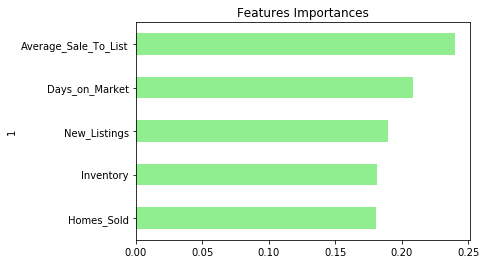

In [208]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
